In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("MNSIT_Train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
l = df['label']

d = df.drop(columns = ['label'])

#**Frist pickup first 15k points to work on time effeciency**
#**Excercise: Perform the same analysis on 42k data points.**

In [7]:
labels = l.head(15000)
data = d.head(15000)

print("Size of the sample data is ",data.shape)

Size of the sample data is  (15000, 784)


**Data Preprocessing:- Standardizing data.**

In [8]:
standardized_data = StandardScaler().fit_transform(data)

standardized_data.shape

(15000, 784)

**Finding the Co-Variance matrix which is: X^T * X.**

In [9]:
sample_data = standardized_data

# matrix - multiplication using numpy

covar_matrix = np.matmul(sample_data.T, sample_data)

print("Shape of the co-variance matrix is ", covar_matrix.shape)

Shape of the co-variance matrix is  (784, 784)


#**Finding the top two eigen values and eigen vectors.**
#**For projecting onto a 2-dimn space.**

In [10]:
from scipy.linalg import eigh

# the first parameter 'eigvals' is defined (low value to high value) how many eigen values and vectors to be reurned
# eigh function will return eigen value and vectors in asending order.
# this code generate only top 2 (782, 783) eigen values.

values, vectors = eigh(covar_matrix, eigvals = (782, 783))

print("Shape of eigen vector = ", vectors.shape)
# converting the eigen vectors into (2, d) shape for easyness 
vectors = vectors.T

print("Updated shape of eigen vector is ",vectors.shape)

Shape of eigen vector =  (784, 2)
Updated shape of eigen vector is  (2, 784)


In [11]:
percentage_variance_explained = np.cumsum(values) / np.sum(values)

percentage_variance_explained

array([0.41827782, 1.        ])

#**projecting the orginal data sample on the plane.**
#**formed by two principal eigen vectors by vector-vector multiplication.**

In [9]:
new_coordinates = np.matmul(vectors, sample_data.T)

print("Resultant new data points shape is ", vectors.shape, " X ", sample_data.T.shape, " = ", new_coordinates.shape)

Resultant new data points shape is  (2, 784)  X  (784, 15000)  =  (2, 15000)


#**Appending label to 2D projected data.**
#**Creating a new data frame for labeled points.**

In [10]:
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data = new_coordinates, columns = ['1st_principal', '2nd_principal', 'label'])

dataframe.head()

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


**ploting 2D data points with seaborn.**

C:\Users\Mani\Anaconda3\envs\your-env-name\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


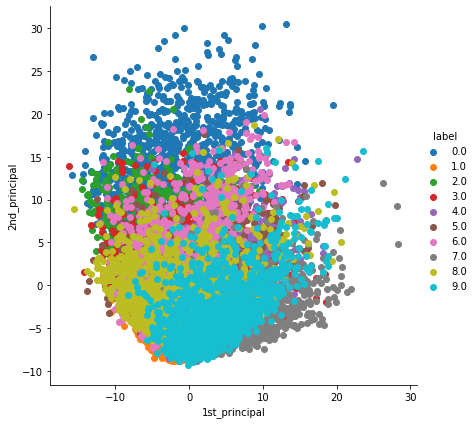

In [11]:
import seaborn as sn

sn.FacetGrid( dataframe, hue = 'label', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

plt.show()

# Conclusion

#**1. 0 and 9 labels are classified good.**

# PCA using Scikit-Learn

In [19]:
from sklearn import decomposition

pca = decomposition.PCA()

In [20]:
# configuring the parameters
# the number of components = 2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contains 2-d projects of simple data

print("Shape of pca_reduced.shape ", pca_data.shape)

Shape of pca_reduced.shape  (15000, 2)


C:\Users\Mani\Anaconda3\envs\your-env-name\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


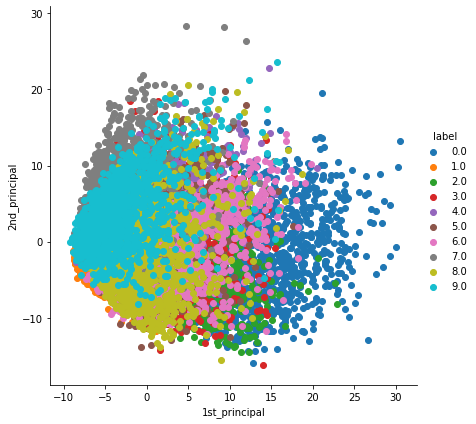

In [21]:
# attaching the label for each 2-d data point

pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data from which help us in plotting the result in data.

pca_df = pd.DataFrame( data = pca_data, columns = ["1st_principal", "2nd_principal", "label"])
sn.FacetGrid(pca_df, hue = 'label', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [22]:
pca_df.head()

,1st_principal,2nd_principal,label
0,-5.043741,-5.558100,1.0
1,19.305254,6.193616,0.0
2,-7.678678,-1.910338,1.0
3,-0.464768,5.525626,4.0
4,26.644284,6.366558,0.0


# PCA for Dimensionality Reduction (Not For Visualization) 

In [25]:
# First we take 784 components 

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum( pca.explained_variance_)

percentage_var_explained

array([5.91234057e-02, 4.25117187e-02, 3.96927453e-02, 3.07701430e-02,
       2.64486625e-02, 2.30731483e-02, 2.00374477e-02, 1.85958613e-02,
       1.62729721e-02, 1.46069626e-02, 1.40720701e-02, 1.26648917e-02,
       1.19402477e-02, 1.15862735e-02, 1.10514259e-02, 1.05810597e-02,
       9.91906618e-03, 9.69032614e-03, 9.50159377e-03, 9.23136172e-03,
       8.79022502e-03, 8.33105967e-03, 8.00153745e-03, 7.79166161e-03,
       7.68317904e-03, 7.25847927e-03, 7.18916409e-03, 7.05513749e-03,
       6.73859937e-03, 6.57321913e-03, 6.40016718e-03, 6.24993371e-03,
       6.08289698e-03, 6.03940032e-03, 5.87246076e-03, 5.85130681e-03,
       5.76777370e-03, 5.65043019e-03, 5.48738352e-03, 5.34415913e-03,
       5.21330312e-03, 5.08136713e-03, 5.07103091e-03, 4.98059156e-03,
       4.84761950e-03, 4.74961154e-03, 4.73162845e-03, 4.62497106e-03,
       4.54527634e-03, 4.44785866e-03, 4.41963364e-03, 4.35688568e-03,
       4.32124780e-03, 4.17024434e-03, 4.08188539e-03, 4.05320334e-03,
      

In [26]:
cum_var_explained = np.cumsum(percentage_var_explained)

cum_var_explained

array([0.05912341, 0.10163512, 0.14132787, 0.17209801, 0.19854668,
       0.22161982, 0.24165727, 0.26025313, 0.2765261 , 0.29113307,
       0.30520514, 0.31787003, 0.32981028, 0.34139655, 0.35244798,
       0.36302904, 0.3729481 , 0.38263843, 0.39214002, 0.40137138,
       0.41016161, 0.41849267, 0.42649421, 0.43428587, 0.44196905,
       0.44922753, 0.45641669, 0.46347183, 0.47021043, 0.47678365,
       0.48318381, 0.48943375, 0.49551664, 0.50155604, 0.5074285 ,
       0.51327981, 0.51904759, 0.52469802, 0.5301854 , 0.53552956,
       0.54074286, 0.54582423, 0.55089526, 0.55587585, 0.56072347,
       0.56547308, 0.57020471, 0.57482968, 0.57937496, 0.58382282,
       0.58824245, 0.59259934, 0.59692058, 0.60109083, 0.60517271,
       0.60922592, 0.61324253, 0.61719243, 0.62107383, 0.62488471,
       0.62860624, 0.63228523, 0.63590085, 0.63943148, 0.64291806,
       0.64639468, 0.64981641, 0.65321635, 0.65654411, 0.65984987,
       0.66311127, 0.66634388, 0.66954524, 0.67264789, 0.67571

**Ploting PCA Sepctrum.**

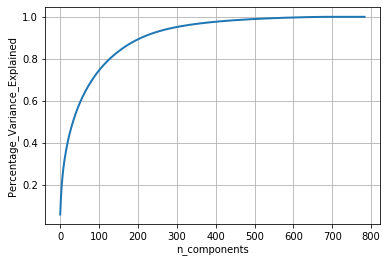

In [27]:
plt.figure(1, figsize = (6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel("Percentage_Variance_Explained")
plt.show()

**By observing plot we can see that 90 percent approx variance(information) is explained by 200 components.**